In [16]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('Obesity-DataSet'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('Obesity-DataSet/Obesity-DataSet.csv', encoding='ISO-8859-2')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


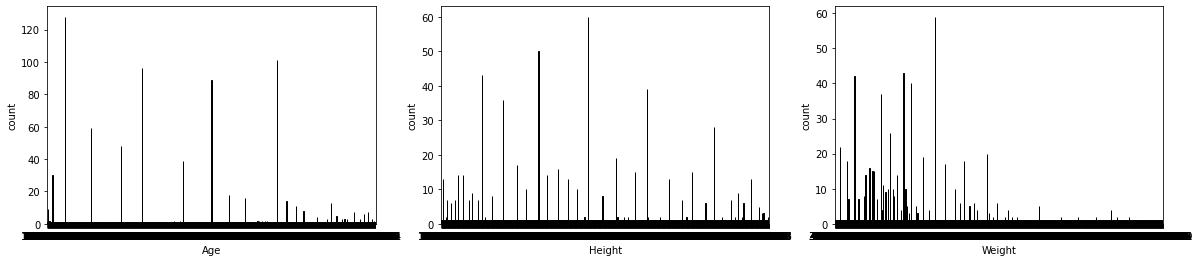

In [5]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Age', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height', data = df, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight', data = df, palette="Greens_r",edgecolor="black")
plt.show()


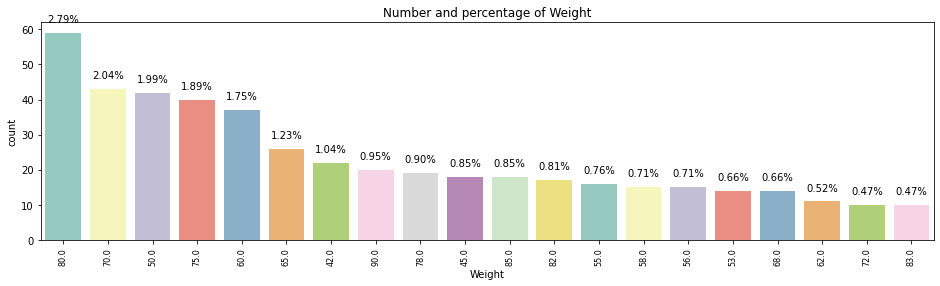

In [9]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(x=df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
plot_count("Weight", "Weight", df,4)    

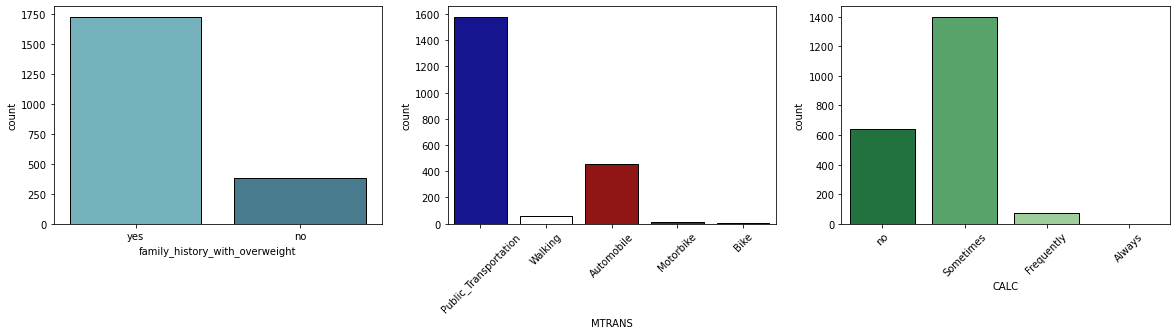

In [10]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")#家族肥胖史
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")#交通工具
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")#酒精
plt.xticks(rotation=45)
plt.show()

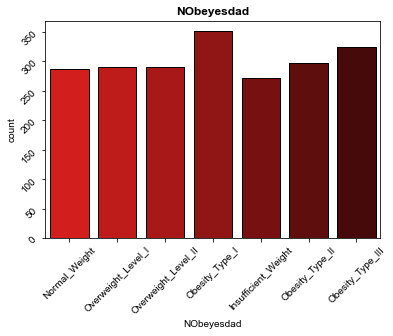

In [11]:
sns.countplot(x="NObeyesdad",data=df,palette="flag",edgecolor="black")
plt.title('NObeyesdad', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

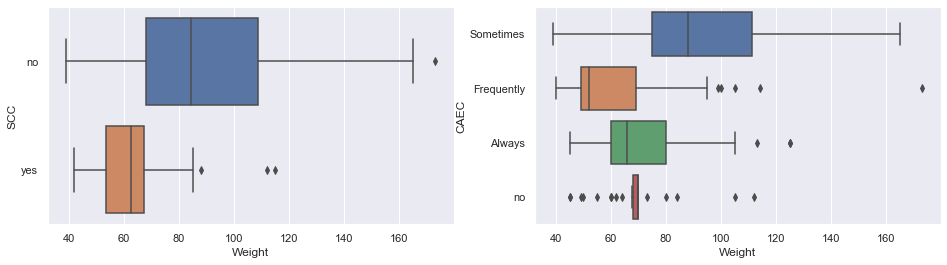

In [12]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)#卡路里消耗监控
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

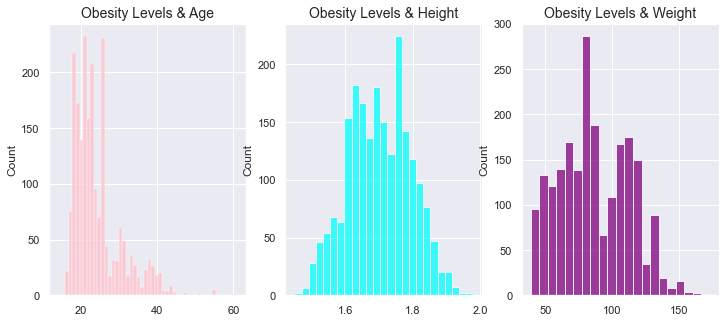

In [23]:
# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.histplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.histplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.histplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [25]:
import plotly.express as px
fig = px.line(df, x="Weight", y="TUE", color_discrete_sequence=['darksalmon'], #TUE	使用科技设备的时间
              title="Obesity Levels and the Use of Technology")
fig.show()